# Coletando Dados da ANA de forma automatizada com HydroBR

### HydroBR é uma biblioteca open-source para trabalhar com análise temporal de dados hidrometeorológicos no Brasil

O HydroBR foi desenvolvido pelo Engenheiro Ambiental e Sanitarista [Wallisson Carvalho](https://wallissoncarvalho.github.io/sobremim/)

Você pode ver mais informações sobre a biblioteca na[Documentação](https://wallissoncarvalho.github.io/HydroBr/)


In [8]:
#importando as bibliotecas
import hydrobr
import geopandas
import contextily as cx
import folium
from plotly.offline import plot

## Dados de Estações Pluviométricas e Fluviométricas

In [2]:
#Obtendo dados de precipitação
precStations = hydrobr.get_data.ANA.list_prec_stations()

#visualizando a tabela
precStations.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5


In [4]:
# filtrando para os dados apenas do RN
precRN = precStations[precStations['State'] == 'RIO GRANDE DO NORTE']

#visualizando o resultado do filtro
precRN.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
741,AREIA BRANCA,00437012,2,37,AREIA BRANCA,RIO GRANDE DO NORTE,EMPARN,-4.95000,-37.1333,1911/01/01,1991/11/30,81,3.7,71,12.3
742,TIBAU,00437013,2,37,GROSSOS,RIO GRANDE DO NORTE,EMPARN,-4.83330,-37.2500,1962/07/01,1991/10/31,30,32.1,10,66.7
1171,CANA BRAVA,00535000,2,38,PUREZA,RIO GRANDE DO NORTE,EMPARN,-5.31670,-35.5667,1962/07/01,1991/12/31,30,3.4,24,20.0
1172,PIRIPIRI,00535002,2,38,MACAÍBA,RIO GRANDE DO NORTE,EMPARN,-5.85000,-35.3500,1911/01/01,1994/02/28,84,37.9,49,41.7
1173,CABO SÃO ROQUE,00535004,2,38,TOUROS,RIO GRANDE DO NORTE,DNOCS,-5.48333,-35.2667,1911/01/01,1924/06/30,14,2.4,11,21.4


In [18]:
#Transformando a tabela em um geodata frame

gdfRN = geopandas.GeoDataFrame(
    precRN,
    geometry = geopandas.points_from_xy(precRN.Longitude,
                                        precRN.Latitude)
)

#definindo sistema de coordenadas
gdfRN = gdfRN.set_crs("epsg:4326")


In [19]:
#transformando para webmercator
gdfRN_wm = gdfRN.to_crs(epsg = 3857)

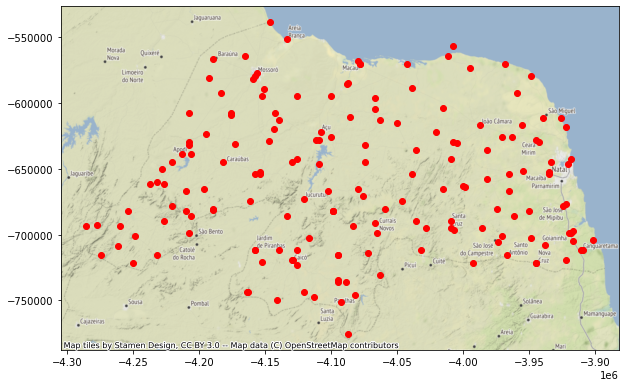

In [21]:
#plotando os dados
ax = gdfRN_wm.plot(figsize=(10,10),
                color = 'red')
#adicionando mapa base
cx.add_basemap(ax)

Uma outra forma que podes fazer é como está na Documentação, tendo um mapa dinâmico. Porém, abaixo, utilizarei a biblioteca Folium.

In [29]:
# Criando mapa com base do OpenStreetMap
map = folium.Map(location = [-5.9000,-36.1333],
                 tiles='OpenStreetMap',
                 zoom_start = 8)

#mostrando o mapa
map

In [31]:
gdfRN_wm.head()

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD,geometry
741,AREIA BRANCA,00437012,2,37,AREIA BRANCA,RIO GRANDE DO NORTE,EMPARN,-4.95000,-37.1333,1911/01/01,1991/11/30,81,3.7,71,12.3,POINT (-4133660.047 -551718.234)
742,TIBAU,00437013,2,37,GROSSOS,RIO GRANDE DO NORTE,EMPARN,-4.83330,-37.2500,1962/07/01,1991/10/31,30,32.1,10,66.7,POINT (-4146651.032 -538679.758)
1171,CANA BRAVA,00535000,2,38,PUREZA,RIO GRANDE DO NORTE,EMPARN,-5.31670,-35.5667,1962/07/01,1991/12/31,30,3.4,24,20.0,POINT (-3959266.933 -592703.548)
1172,PIRIPIRI,00535002,2,38,MACAÍBA,RIO GRANDE DO NORTE,EMPARN,-5.85000,-35.3500,1911/01/01,1994/02/28,84,37.9,49,41.7,POINT (-3935144.000 -652353.447)
1173,CABO SÃO ROQUE,00535004,2,38,TOUROS,RIO GRANDE DO NORTE,DNOCS,-5.48333,-35.2667,1911/01/01,1924/06/30,14,2.4,11,21.4,POINT (-3925871.086 -611335.411)


In [42]:
#Adicionando as estações ao mapa

#fazendo uma lista com os itens a serem utilizados
lat = list(gdfRN['Latitude'])
long = list(gdfRN['Longitude'])
cidade = list(gdfRN['City'])
nome = list(gdfRN['Name'])
inicio = list(gdfRN['StartDate'])
fim = list(gdfRN['EndDate'])

fg = folium.FeatureGroup(name = 'my map')

#looping para plotar
for lat, long, cidade, nome, inicio, fim in zip(lat, long, cidade, nome, inicio, fim):
     fg.add_child(folium.Marker(location = [lat, long], popup =" <b> Name: </b>" + nome + "<br> <b> Cidade: </b>" + cidade + "<br> <b> Inicio </b>" +inicio+ "<br> <b> Fim: </b>" +fim))
map.add_child(fg)    

Para baixar dados de estações pluviométricas basta utilizar a função abaixo:

`hydrobr.get_data.ANA.list_flow_stations()`

- Você também pode usar a opção de filtrar diretamente na função, ficando dessa forma: 

`hydrobr.get_data.ANA.list_flow_stations(state='RIO GRANDE DO NORTE')`

## Baixando dados

In [43]:
#Fazer um filtro para baixar dados da cidade de Touros

dataDownload = gdfRN[gdfRN['City'] == 'TOUROS']
dataDownload.head()


,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD,geometry
1173,CABO SÃO ROQUE,00535004,2,38,TOUROS,RIO GRANDE DO NORTE,DNOCS,-5.48333,-35.2667,1911/01/01,1924/06/30,14,2.4,11,21.4,POINT (-35.26670 -5.48333)
1184,SÃO MIGUEL DO GOSTOSO,00535020,2,38,TOUROS,RIO GRANDE DO NORTE,SUDENE,-5.11667,-35.6500,1962/07/01,1997/10/31,36,68.4,10,72.2,POINT (-35.65000 -5.11667)
1185,TOUROS,00535021,2,38,TOUROS,RIO GRANDE DO NORTE,EMPARN,-5.20000,-35.4667,1910/10/01,1991/07/31,82,1.4,71,13.4,POINT (-35.46670 -5.20000)


In [44]:
#Total são 3 estações em Touros.

#Agora, vamos fazer uma lista com os códigos

TouroStations = dataDownload.Code.to_list()

#Mostrando a lista
TouroStations

['00535004', '00535020', '00535021']

In [47]:
#Baixando os dados a partir da lista gerada
downloaded = hydrobr.get_data.ANA.prec_data(TouroStations)

#baixaram 3 estações e levou cerca de 6min.

100%|████████████████████████████████████████████| 3/3 [06:04<00:00, 121.58s/it]


In [48]:
#obtendo informações dos dados
downloaded.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31808 entries, 1910-10-01 to 1997-10-31
Freq: D
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   00535004  4810 non-null   float64
 1   00535020  4081 non-null   float64
 2   00535021  29096 non-null  float64
dtypes: float64(3)
memory usage: 994.0 KB


In [ ]:
#Agora, vamos plotar em um gráfico de Gantt para ver a distriuição dos dados.

gantt_fig = hydrobr.Plot.gantt(downloaded) #Get the Gantt Fig

#Updating the layout
gantt_fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis_title = 'Year',
    yaxis_title = 'Station Code')

#To plot and save the gantt plot as html
plot(gantt_fig,filename='gantt' + '.html') 

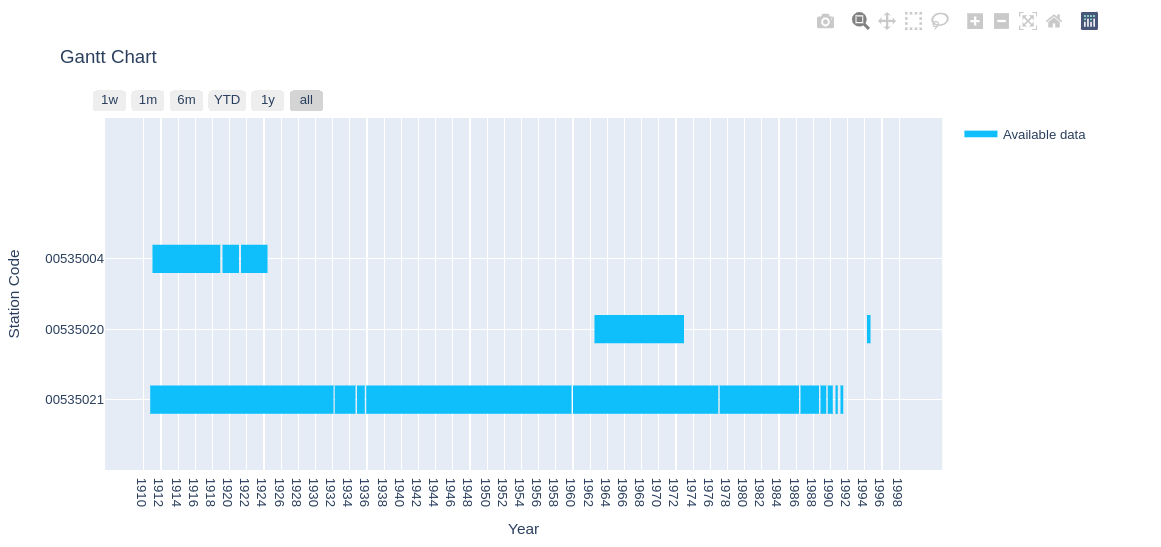

### Informações

Feito por Rodrigo Brust

Biblioteca: [HydroBR](https://wallissoncarvalho.github.io/HydroBr/)
